# Figure 3

## Caption
Time-invariant locations of a) municipal water intake sites b) beaches c) recreational boating. Symbol color represents normalized usage for each index. Red shading indicates the number of days a threshold of 1 μgL-1 is exceeded at each model point in a) June b) July and c) August. For clarity of presentation, time-invariant ecosystem services are plotted on the map only for a single month. The insets at the bottom of A), B), and C) magnify the Sheboygan river (D, F, H) region and Washington Island region (E, G, I) in June, July, and August, respectively. 


In [1]:
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42

import numpy as np
import xarray as xr
import pandas as pd
import cmocean
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.geoaxes import GeoAxes
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import from_levels_and_colors
from mpl_toolkits.axes_grid1 import AxesGrid
from matplotlib.lines import Line2D

import matplotlib.patches as patches
    
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

# Load data

In [2]:
%run _load_directories.ipynb

DIRECTORIES
>> {dir_raw}
/local/data/artemis/workspace/gloege/MITgcm-Michigan-Phosphorus/data/raw

>> {dir_clean}
/local/data/artemis/workspace/gloege/MITgcm-Michigan-Phosphorus/data/clean

>> {dir_figs}
/local/data/artemis/workspace/gloege/MITgcm-Michigan-Phosphorus/results/figures


In [3]:
## Raw data
ds_grid = xr.open_dataset(f'{dir_raw}/grid_lake_michigan.nc')
## Clean data
ds_ed = xr.open_dataset(f'{dir_clean}/exceedance_days_all_rivers_MJJA.nc')
#ds_ed = xr.open_dataset('/home/gloege/projects/michigan-phosphorus/notebooks/output/exceedance_days_all_rivers_MJJA.nc')
ds_es = xr.open_dataset(f'{dir_clean}/normalized_es.nc')

# Generate Figure
This is weird, you have to run this cell twice to make it generate the figure properly

/usr/local/python/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


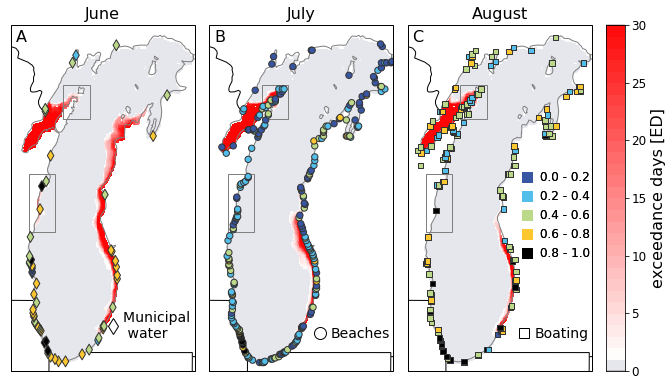

In [5]:
fig = plt.figure(figsize=(11, 7.2))
projection = ccrs.Mercator()
axes_class = (GeoAxes, dict(map_projection=projection))
grid = AxesGrid(fig, 111, axes_class=axes_class,
                nrows_ncols=(1, 3),
                axes_pad=0.2,
                cbar_location='right',
                cbar_mode='single',
                cbar_pad=0.2,
                cbar_size='10%',
                label_mode='')  # note the empty label_mode

### ==============================================================
### Set boundary
### ==============================================================
for ax in grid:
    ax.set_extent([-84.75, -88.25, 41.5, 46.25]) ### Michigan

### ==============================================================
### Colormap of data
### ============================================================== 
### Define colormap
### This is really hackey to make extend=max work
num_levels = 31
vmin, vmax = 0, 30
midpoint = 1
n_levels = np.linspace(vmin, vmax, num_levels) # <--hacky
levels = np.linspace(vmin, vmax, num_levels+1) # <--hacky
midp = np.mean(np.c_[levels[:-1], levels[1:]], axis=1)
vals = np.interp(midp, [vmin, midpoint, vmax], [0, 0.5, 1])
colors = cmocean.cm.balance(vals)
colors = plt.cm.bwr(vals)
colors[0] = (0.9, 0.9, 0.93, 1.0)
cmap, norm = from_levels_and_colors(n_levels, colors, extend='max')

### Month and title
month = ['june', 'july', 'august']
title = ['June', 'July', 'August']

### Loop over each axis
for ax, mon, title in zip(grid, month, title):
    pos = ax.pcolormesh(ds_ed['X'].values, 
                        ds_ed['Y'].values, 
                        np.ma.masked_array(ds_ed['cumulative'].
                          where(ds_ed['month']==mon).
                          dropna('month').
                          squeeze().
                          values, mask=(ds_grid['Depth'].values==0)),
                        cmap = cmap, 
                        norm = norm,
                        vmin = vmin, 
                        vmax = vmax,
                        transform=ccrs.PlateCarree(),
                        zorder = 2)
    pos.axes.set_title(title, fontsize=16)
    
    ## Create a Rectangle patch
#[-87.4, -87.9, 43.45, 44.25]) ### sheboygan
#[-86.75, -87.25, 45, 45.45]) ### washington island
    xloc = [-87.4, -87.9]
    yloc = [43.45, 44.25]
    rect1 = patches.Rectangle((xloc[1],yloc[0]), abs(xloc[0]-xloc[1]), abs(yloc[0]-yloc[1]), 
                             linewidth=1,
                             edgecolor=[0.5,0.5,0.5],
                             facecolor='None', 
                             transform=ccrs.PlateCarree(), zorder=6)
    
    ax.add_patch(rect1)
    
    xloc = [-86.75, -87.25]
    yloc = [45, 45.45]
    rect2 = patches.Rectangle((xloc[1],yloc[0]), abs(xloc[0]-xloc[1]), abs(yloc[0]-yloc[1]), 
                             linewidth=1,
                             edgecolor=[0.5,0.5,0.5],
                             facecolor='None', 
                             transform=ccrs.PlateCarree(), zorder=6)
    ax.add_patch(rect2)
    
### Plot box
#ax.set_extent([-87.25, -87.9, 43.45, 44.2])
#grid[0].patch(xy=(-87.9, 43.45), width=0.5, height=1, transform=ccrs.PlateCarree(), zorder=5)

    
    
### ==============================================================
### Create a feature for States/Admin 1 
### regions at 1:50m from Natural Earth
### ==============================================================
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')
for ax in grid:
    ax.add_feature(states_provinces, 
                   edgecolor='black', 
                   facecolor='none', 
                   zorder=1)


### ==============================================================
### Create a feature for lakes at 1:50m from Natural Earth
### ==============================================================
lakes_50m = cfeature.NaturalEarthFeature(
    category='physical',
    name='lakes',
    scale='10m',
    facecolor='none')
for ax in grid:
    ax.add_feature(lakes_50m, 
                   edgecolor=(0.5,0.5,0.5), 
                   facecolor='none', 
                   zorder=2)

    
### ==============================================================
### Add ecosystem services 
### ==============================================================
### Symbols for service legend
square = Line2D(range(1), range(1), 
                color="white", 
                marker='s', 
                markersize=12, 
                markeredgecolor = 'k', 
                markerfacecolor='None')
circle = Line2D(range(1), range(1), 
                color="white", 
                marker='o', 
                markersize=12, 
                markeredgecolor = 'k', 
                markerfacecolor='None')
diamond = Line2D(range(1), range(1), 
                  color="white", 
                  marker='d', 
                  markersize=12, 
                  markeredgecolor = 'k',
                  markerfacecolor='None')

### define ES colors
darkBlue = (56/255, 86/255, 162/255, 1)
lightBlue = (82/255, 190/255, 234/255, 1)
lightGreen = (188/255, 217/255, 138/255, 1)
gold = (253/255, 200/255, 47/255, 1.0)
red = (235/255, 34/255, 46/255, 1.0)
gray = (0.5, 0.5, 0.5, 1.0)
black = (0, 0, 0, 1.0)

### Color swatches for service legend
darkBlueSquare = Line2D(range(1), range(1), 
                        color="white", 
                        marker='s', 
                        markersize=12, 
                        markerfacecolor=darkBlue)
lightBlueSquare = Line2D(range(1), range(1), 
                         color="white", 
                         marker='s', 
                         markersize=12, 
                         markerfacecolor=lightBlue)
lightGreenSquare = Line2D(range(1), range(1), 
                          color="white",
                          marker='s', 
                          markersize=12, 
                          markerfacecolor=lightGreen)
goldSquare = Line2D(range(1), range(1), 
                    color="white", 
                    marker='s', 
                    markersize=12, 
                    markerfacecolor=gold)
redSquare = Line2D(range(1), range(1), 
                   color="white", 
                   marker='s', 
                   markersize=12, 
                   markerfacecolor=red )

blackSquare = Line2D(range(1), range(1), 
                   color="white", 
                   marker='s', 
                   markersize=12, 
                   markerfacecolor=black )


### define colormap
cmap = cmocean.cm.amp
cmap.N = 5
cmaplist = [cmap(i) for i in range(cmap.N)]
cmaplist[0] = darkBlue
cmaplist[1] = lightBlue
cmaplist[2] = lightGreen
cmaplist[3] = gold
cmaplist[4] = black
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)
bounds = np.linspace(0,1,6)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

### Model grid points
### mask non-ES sites usiing .where(ES>0)
X,Y = np.meshgrid(ds_es['X'].values, 
                  ds_es['Y'].values)

### ===============================================================
### water Legend
### ===============================================================
water_plot = grid[0].scatter(X, Y,
                             c=ds_es['water_norm'].where(ds_es['water_norm']>0).values, 
                             edgecolors=[0.2, 0.2, 0.2], 
                             cmap=cmap,
                             norm=norm,
                             s=60, 
                             zorder=20,
                             transform=ccrs.PlateCarree(),
                             marker='d',
                             label='Municipal \n water')

grid[0].legend([diamond], ['Municipal \n water'], 
               loc='lower right',  
               bbox_to_anchor=(1.07, 0.05),  
               frameon=False, 
               fontsize=14,  
               labelspacing=0.0,
               handletextpad=-0.25,
               markerscale=1.)
       
    
### ===============================================================
### Beach Legend
### ===============================================================
beach_plot = grid[1].scatter(X, Y,
                         c=ds_es['beaches_norm'].where(ds_es['beaches_norm']>0).values, 
                         edgecolors=[0.2, 0.2, 0.2], 
                         cmap=cmap,
                         norm=norm,
                         s=40, 
                         zorder=20,
                         transform=ccrs.PlateCarree(),
                         marker='o',
                         label='Beaches')

grid[1].legend([circle], ['Beaches'], 
               loc='lower right',  bbox_to_anchor=(1.05, 0.05),  
               frameon=False,         
               fontsize=14,  
               labelspacing=0.0,
               handletextpad=-0.25,
               markerscale=1.)

### ===============================================================
### Boating Legend
### ===============================================================
boating_plot = grid[2].scatter(X, Y,
                        c=ds_es['boating_norm'].where(ds_es['boating_norm']>0).values, 
                        edgecolors=[0.2, 0.2, 0.2], 
                        cmap=cmap,
                        norm=norm,
                        s=30, 
                        zorder=20,
                        transform=ccrs.PlateCarree(),
                        marker='s',
                        label='Boating')

legend_boating = grid[2].legend([square], ['Boating'], 
                                loc='lower right',  
                                bbox_to_anchor=(1.05, 0.05),  
                                frameon=False, 
                                fontsize=14,  
                                labelspacing=0.0,
                                handletextpad=-0.25,
                                markerscale=0.8)

### ==============================================================
### Add colorbar
### ==============================================================
cbar = grid.cbar_axes[0].colorbar(pos)
cbar.set_label_text(r'exceedance days [ED]', fontsize=16)
cbar.ax.set_yticks(np.arange(0, 32, 5))
cbar.ax.tick_params(labelsize=12)

#========================================================
# Legend for service uses color swatches
#========================================================
legList = [darkBlueSquare ,lightBlueSquare, lightGreenSquare, goldSquare, blackSquare]
legend_swatches = grid[2].legend(legList,
                     ["0.0 - 0.2", "0.2 - 0.4", "0.4 - 0.6", "0.6 - 0.8", "0.8 - 1.0"], 
                     loc = "center left", 
                     bbox_to_anchor = (0.525, 0.45), 
                     frameon = 0,
                     fontsize = 12,
                     handletextpad=0.05,
                     numpoints = 1)

### So both axes appear on same plot
grid[2].add_artist(legend_swatches)
grid[2].add_artist(legend_boating)

#========================================================
# Subplot labels
#========================================================
label_a = AnchoredText("A", loc=2, prop=dict(size=16), frameon=False, pad=0.3, borderpad=0)
label_b = AnchoredText("B", loc=2, prop=dict(size=16), frameon=False, pad=0.3, borderpad=0)
label_c = AnchoredText("C", loc=2, prop=dict(size=16), frameon=False, pad=0.3, borderpad=0)
grid[0].add_artist(label_a)
grid[1].add_artist(label_b)
grid[2].add_artist(label_c)



In [6]:
fig.savefig(f'{dir_figs}/Figure_3.pdf', bbox_inches='tight',pad_inches=0)

/usr/local/python/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


# The code below makes the insets

## 1. Washington Island insets

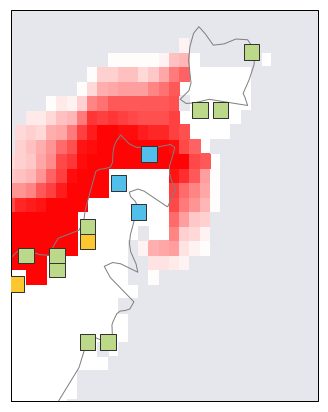

In [296]:
fig = plt.figure(figsize=(11, 7.2))
projection = ccrs.Mercator()
axes_class = (GeoAxes, dict(map_projection=projection))
grid = AxesGrid(fig, 111, axes_class=axes_class,
                nrows_ncols=(1, 1),
                axes_pad=0.2,
                cbar_location='right',
                cbar_mode='none',
                cbar_pad=0.2,
                #cbar_size='10%',
                label_mode='')  # note the empty label_mode

### ==============================================================
### Set boundary
### ==============================================================
grid[0].set_extent([-86.75, -88, 43.35, 45.6]) ### western shoreline
grid[0].set_extent([-87.4, -87.9, 43.45, 44.25]) ### sheboygan
grid[0].set_extent([-86.75, -87.25, 45, 45.45]) ### washington island

### ==============================================================
### Colormap of data
### ============================================================== 
### Define colormap
### This is really hackey to make extend=max work
num_levels = 31
vmin, vmax = 0, 30
midpoint = 1
n_levels = np.linspace(vmin, vmax, num_levels) # <--hacky
levels = np.linspace(vmin, vmax, num_levels+1) # <--hacky
midp = np.mean(np.c_[levels[:-1], levels[1:]], axis=1)
vals = np.interp(midp, [vmin, midpoint, vmax], [0, 0.5, 1])
colors = cmocean.cm.balance(vals)
colors = plt.cm.bwr(vals)
colors[0] = (0.9, 0.9, 0.93, 1.0)
cmap, norm = from_levels_and_colors(n_levels, colors, extend='max')

### Month and title
#month = ['june', 'july', 'august']
#title = ['June', 'July', 'August']


month = 'august'

if month=='june':
    service ='water_norm'
    label_letter="(d)"
    marker='d'
    size=120*4
elif month=='july':
    service='beaches_norm'
    label_letter="(e)"
    marker='o'
    size=80*4
elif month=='august':
    service='boating_norm'
    label_letter="(f)"
    marker='s'
    size=60*4
    
### Loop over each axis
#for ax, mon in zip(grid, month):
pos = grid[0].pcolormesh(ds_ed['X'].values, 
                    ds_ed['Y'].values, 
                    np.ma.masked_array(ds_ed['cumulative'].
                      where(ds_ed['month']==month).
                      dropna('month').
                      squeeze().
                      values, mask=(ds_grid['Depth'].values==0)),
                    cmap = cmap, 
                    norm = norm,
                    vmin = vmin, 
                    vmax = vmax,
                    transform=ccrs.PlateCarree(),
                    zorder = 2)

    
### ==============================================================
### Create a feature for States/Admin 1 
### regions at 1:50m from Natural Earth
### ==============================================================
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')

grid[0].add_feature(states_provinces, 
                   edgecolor='black', 
                   facecolor='none', 
                   zorder=1)

### ==============================================================
### Create a feature for lakes at 1:50m from Natural Earth
### ==============================================================
lakes_50m = cfeature.NaturalEarthFeature(
    category='physical',
    name='lakes',
    scale='10m',
    facecolor='none')
grid[0].add_feature(lakes_50m, 
                   edgecolor=(0.5,0.5,0.5), 
                   facecolor='none', 
                   zorder=2)

    
### ==============================================================
### Add ecosystem services 
### ==============================================================
### Symbols for service legend
square = Line2D(range(1), range(1), 
                color="white", 
                marker='s', 
                markersize=12, 
                markeredgecolor = 'k', 
                markerfacecolor='None')
circle = Line2D(range(1), range(1), 
                color="white", 
                marker='o', 
                markersize=12, 
                markeredgecolor = 'k', 
                markerfacecolor='None')
diamond = Line2D(range(1), range(1), 
                  color="white", 
                  marker='d', 
                  markersize=12, 
                  markeredgecolor = 'k',
                  markerfacecolor='None')

### define ES colors
darkBlue = (56/255, 86/255, 162/255, 1)
lightBlue = (82/255, 190/255, 234/255, 1)
lightGreen = (188/255, 217/255, 138/255, 1)
gold = (253/255, 200/255, 47/255, 1.0)
red = (235/255, 34/255, 46/255, 1.0)
gray = (0.5, 0.5, 0.5, 1.0)
black = (0, 0, 0, 1.0)

### Color swatches for service legend
darkBlueSquare = Line2D(range(1), range(1), 
                        color="white", 
                        marker='s', 
                        markersize=12, 
                        markerfacecolor=darkBlue)
lightBlueSquare = Line2D(range(1), range(1), 
                         color="white", 
                         marker='s', 
                         markersize=12, 
                         markerfacecolor=lightBlue)
lightGreenSquare = Line2D(range(1), range(1), 
                          color="white",
                          marker='s', 
                          markersize=12, 
                          markerfacecolor=lightGreen)
goldSquare = Line2D(range(1), range(1), 
                    color="white", 
                    marker='s', 
                    markersize=12, 
                    markerfacecolor=gold)
redSquare = Line2D(range(1), range(1), 
                   color="white", 
                   marker='s', 
                   markersize=12, 
                   markerfacecolor=red )

blackSquare = Line2D(range(1), range(1), 
                   color="white", 
                   marker='s', 
                   markersize=12, 
                   markerfacecolor=black )


### define colormap
cmap = cmocean.cm.amp
cmap.N = 5
cmaplist = [cmap(i) for i in range(cmap.N)]
cmaplist[0] = darkBlue
cmaplist[1] = lightBlue
cmaplist[2] = lightGreen
cmaplist[3] = gold
cmaplist[4] = black
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)
bounds = np.linspace(0,1,6)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

### Model grid points
### mask non-ES sites usiing .where(ES>0)
X,Y = np.meshgrid(ds_es['X'].values, 
                  ds_es['Y'].values)


### ===============================================================
### water Legend
### ===============================================================
water_plot = grid[0].scatter(X, Y,
                             c=ds_es[service].where(ds_es[service]>0).values, 
                             edgecolors=[0.2, 0.2, 0.2], 
                             cmap=cmap,
                             norm=norm,
                             s=size, 
                             zorder=20,
                             transform=ccrs.PlateCarree(),
                             marker=marker,
                             label='Municipal \n water')
    
#label = AnchoredText("(e)", loc=2, prop=dict(size=16), frameon=False, pad=0.3, borderpad=0)
#grid[0].add_artist(label)

In [297]:
fig.savefig(f'{dir_figs}/Figure_3_wash_August.pdf', bbox_inches='tight',pad_inches=0)

## 2. Sheboygan River insets

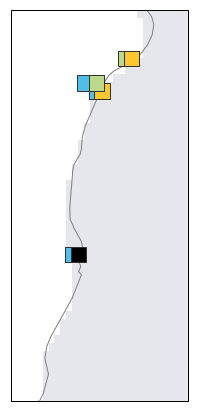

In [302]:
fig = plt.figure(figsize=(11, 7.2))
projection = ccrs.Mercator()
axes_class = (GeoAxes, dict(map_projection=projection))
grid = AxesGrid(fig, 111, axes_class=axes_class,
                nrows_ncols=(1, 1),
                axes_pad=0.2,
                cbar_location='right',
                cbar_mode='none',
                cbar_pad=0.2,
                #cbar_size='10%',
                label_mode='')  # note the empty label_mode

### ==============================================================
### Set boundary
### ==============================================================
grid[0].set_extent([-86.75, -88, 43.35, 45.6]) ### western shoreline
grid[0].set_extent([-87.4, -87.9, 43.45, 44.25]) ### sheboygan
#grid[0].set_extent([-86.75, -87.25, 45, 45.45]) ### washington island

### ==============================================================
### Colormap of data
### ============================================================== 
### Define colormap
### This is really hackey to make extend=max work
num_levels = 31
vmin, vmax = 0, 30
midpoint = 1
n_levels = np.linspace(vmin, vmax, num_levels) # <--hacky
levels = np.linspace(vmin, vmax, num_levels+1) # <--hacky
midp = np.mean(np.c_[levels[:-1], levels[1:]], axis=1)
vals = np.interp(midp, [vmin, midpoint, vmax], [0, 0.5, 1])
colors = cmocean.cm.balance(vals)
colors = plt.cm.bwr(vals)
colors[0] = (0.9, 0.9, 0.93, 1.0)
cmap, norm = from_levels_and_colors(n_levels, colors, extend='max')

### Month and title
#month = ['june', 'july', 'august']
#title = ['June', 'July', 'August']


month = 'august'

if month=='june':
    service ='water_norm'
    label_letter="(d)"
    marker='d'
    size=120*4
elif month=='july':
    service='beaches_norm'
    label_letter="(e)"
    marker='o'
    size=80*4
elif month=='august':
    service='boating_norm'
    label_letter="(f)"
    marker='s'
    size=60*4
    
### Loop over each axis
#for ax, mon in zip(grid, month):
pos = grid[0].pcolormesh(ds_ed['X'].values, 
                    ds_ed['Y'].values, 
                    np.ma.masked_array(ds_ed['cumulative'].
                      where(ds_ed['month']==month).
                      dropna('month').
                      squeeze().
                      values, mask=(ds_grid['Depth'].values==0)),
                    cmap = cmap, 
                    norm = norm,
                    vmin = vmin, 
                    vmax = vmax,
                    transform=ccrs.PlateCarree(),
                    zorder = 2)

    
### ==============================================================
### Create a feature for States/Admin 1 
### regions at 1:50m from Natural Earth
### ==============================================================
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')

grid[0].add_feature(states_provinces, 
                   edgecolor='black', 
                   facecolor='none', 
                   zorder=1)

### ==============================================================
### Create a feature for lakes at 1:50m from Natural Earth
### ==============================================================
lakes_50m = cfeature.NaturalEarthFeature(
    category='physical',
    name='lakes',
    scale='10m',
    facecolor='none')
grid[0].add_feature(lakes_50m, 
                   edgecolor=(0.5,0.5,0.5), 
                   facecolor='none', 
                   zorder=2)

    
### ==============================================================
### Add ecosystem services 
### ==============================================================
### Symbols for service legend
square = Line2D(range(1), range(1), 
                color="white", 
                marker='s', 
                markersize=12, 
                markeredgecolor = 'k', 
                markerfacecolor='None')
circle = Line2D(range(1), range(1), 
                color="white", 
                marker='o', 
                markersize=12, 
                markeredgecolor = 'k', 
                markerfacecolor='None')
diamond = Line2D(range(1), range(1), 
                  color="white", 
                  marker='d', 
                  markersize=12, 
                  markeredgecolor = 'k',
                  markerfacecolor='None')

### define ES colors
darkBlue = (56/255, 86/255, 162/255, 1)
lightBlue = (82/255, 190/255, 234/255, 1)
lightGreen = (188/255, 217/255, 138/255, 1)
gold = (253/255, 200/255, 47/255, 1.0)
red = (235/255, 34/255, 46/255, 1.0)
gray = (0.5, 0.5, 0.5, 1.0)
black = (0, 0, 0, 1.0)

### Color swatches for service legend
darkBlueSquare = Line2D(range(1), range(1), 
                        color="white", 
                        marker='s', 
                        markersize=12, 
                        markerfacecolor=darkBlue)
lightBlueSquare = Line2D(range(1), range(1), 
                         color="white", 
                         marker='s', 
                         markersize=12, 
                         markerfacecolor=lightBlue)
lightGreenSquare = Line2D(range(1), range(1), 
                          color="white",
                          marker='s', 
                          markersize=12, 
                          markerfacecolor=lightGreen)
goldSquare = Line2D(range(1), range(1), 
                    color="white", 
                    marker='s', 
                    markersize=12, 
                    markerfacecolor=gold)
redSquare = Line2D(range(1), range(1), 
                   color="white", 
                   marker='s', 
                   markersize=12, 
                   markerfacecolor=red )

blackSquare = Line2D(range(1), range(1), 
                   color="white", 
                   marker='s', 
                   markersize=12, 
                   markerfacecolor=black )


### define colormap
cmap = cmocean.cm.amp
cmap.N = 5
cmaplist = [cmap(i) for i in range(cmap.N)]
cmaplist[0] = darkBlue
cmaplist[1] = lightBlue
cmaplist[2] = lightGreen
cmaplist[3] = gold
cmaplist[4] = black
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)
bounds = np.linspace(0,1,6)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

### Model grid points
### mask non-ES sites usiing .where(ES>0)
X,Y = np.meshgrid(ds_es['X'].values, 
                  ds_es['Y'].values)


### ===============================================================
### water Legend
### ===============================================================
water_plot = grid[0].scatter(X, Y,
                             c=ds_es[service].where(ds_es[service]>0).values, 
                             edgecolors=[0.2, 0.2, 0.2], 
                             cmap=cmap,
                             norm=norm,
                             s=size, 
                             zorder=20,
                             transform=ccrs.PlateCarree(),
                             marker=marker,
                             label='Municipal \n water')
    
#label = AnchoredText(label_letter, loc=2, prop=dict(size=16), frameon=False, pad=0.3, borderpad=0)
#grid[0].add_artist(label)

In [303]:
fig.savefig(f'{dir_figs}/Figure_3_sheboygan_August.pdf', bbox_inches='tight',pad_inches=0)